In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv


In [2]:
import torch
from sklearn.preprocessing import MinMaxScaler ,LabelEncoder

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Preprocessed data

In [3]:
df = pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv',index_col = 'loan_id')
df1 = df.copy()

In [4]:
df[df.isna() == True].count()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

# Note here there is a problem in dataset column as there is space in names which cause problem so let us rename the columns.

In [5]:
df.rename(columns = {' no_of_dependents': 'no_of_dependents',
                     ' education' : 'education', 
                     ' self_employed' : 'self_employed',
                     ' income_annum' : 'income_annum',
                     ' loan_amount' : 'loan_amount',
                     ' loan_term' :'loan_term',
                     ' cibil_score' : 'cibil_score',
                     ' residential_assets_value' : 'residential_assets_value', 
                     ' commercial_assets_value' : 'commercial_assets_value',
                     ' luxury_assets_value' : 'luxury_assets_value',
                     ' bank_asset_value' : 'bank_asset_value',
                     ' loan_status' : 'loan_status'}, 
                      inplace = True)
df.columns
col = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'education_ Graduate',
       'education_ Not Graduate', 'self_employed_ No', 'self_employed_ Yes',
       'Total_assets_value']
Scaling = ['residential_assets_value','commercial_assets_value',	'luxury_assets_value'	,'bank_asset_value']

In [6]:
label_encoder  =LabelEncoder()
mx = MinMaxScaler()
def preprocess(df):
    y = df.pop('loan_status')
    y = label_encoder.fit_transform(y)
    
    df = pd.get_dummies(df)
    
    df['Total_assets_value'] = 0
    for i in Scaling:
        df['Total_assets_value'] += df[i] 
    
    df[col]=mx.fit_transform(df[col])
    df = df.drop(columns = Scaling)
    
    
    
    return df,y

df,y = preprocess(df)

## Graphing

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'education_ Graduate', 'education_ Not Graduate',
       'self_employed_ No', 'self_employed_ Yes', 'Total_assets_value'],
      dtype='object')

<Axes: xlabel='loan_id', ylabel='no_of_dependents'>

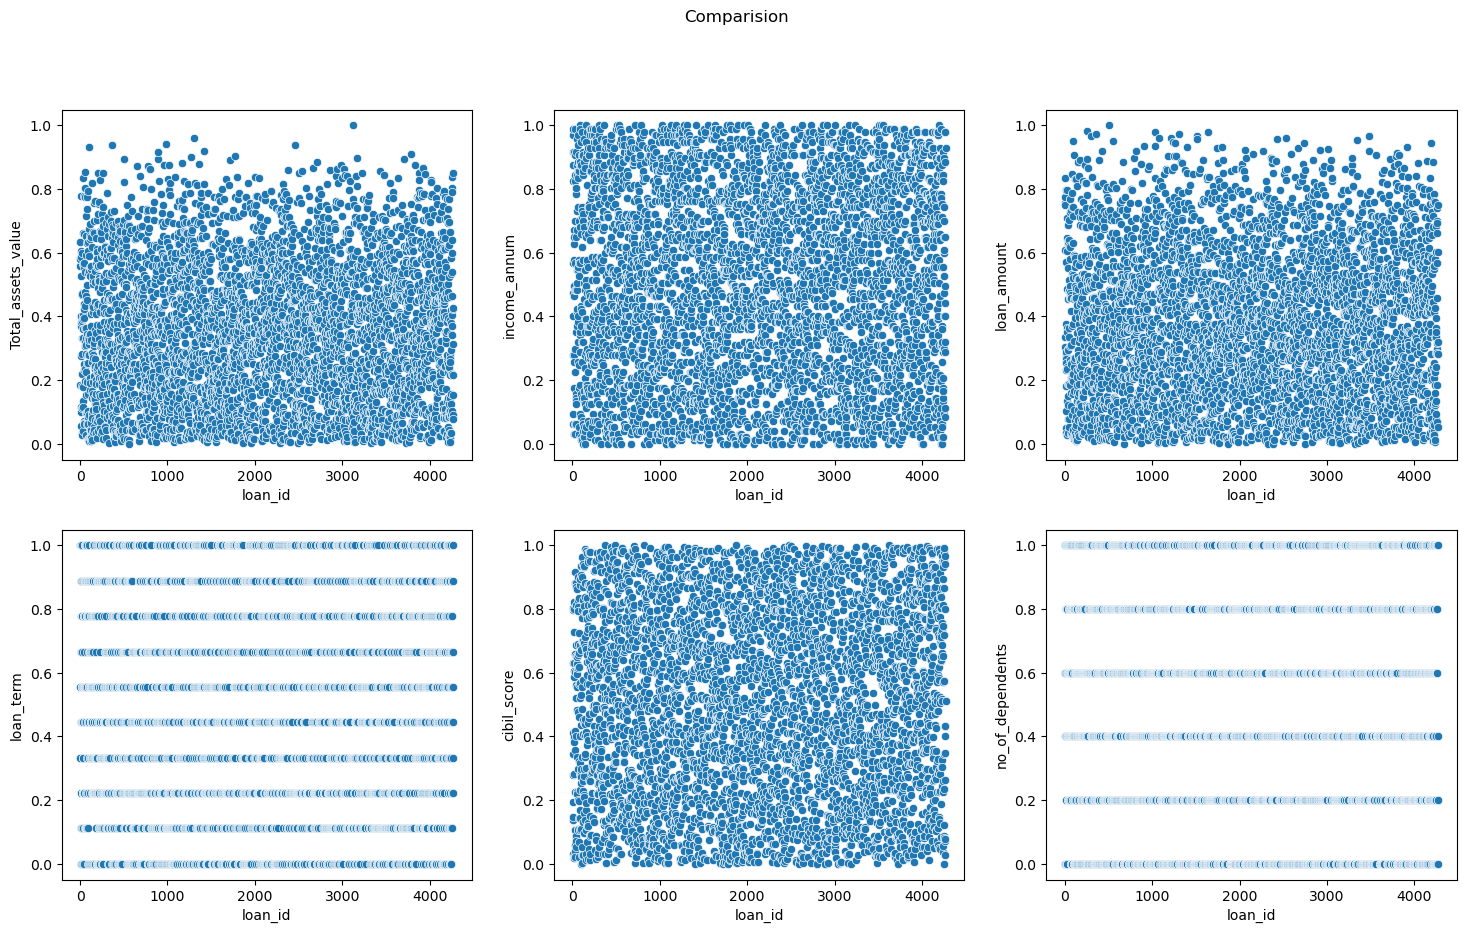

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Comparision')
sns.scatterplot( df ,ax=axes[0, 0] , x = 'loan_id', y =  'Total_assets_value' ,)
sns.scatterplot( df ,ax=axes[0, 1] , x = 'loan_id', y =  'income_annum')
sns.scatterplot( df ,ax=axes[0, 2] , x = 'loan_id', y =  'loan_amount')
sns.scatterplot( df ,ax=axes[1, 0] , x = 'loan_id', y =  'loan_term')
sns.scatterplot( df ,ax=axes[1, 1] , x = 'loan_id', y =  'cibil_score')
sns.scatterplot( df ,ax=axes[1, 2] , x = 'loan_id', y =  'no_of_dependents')

<Axes: ylabel='no_of_dependents'>

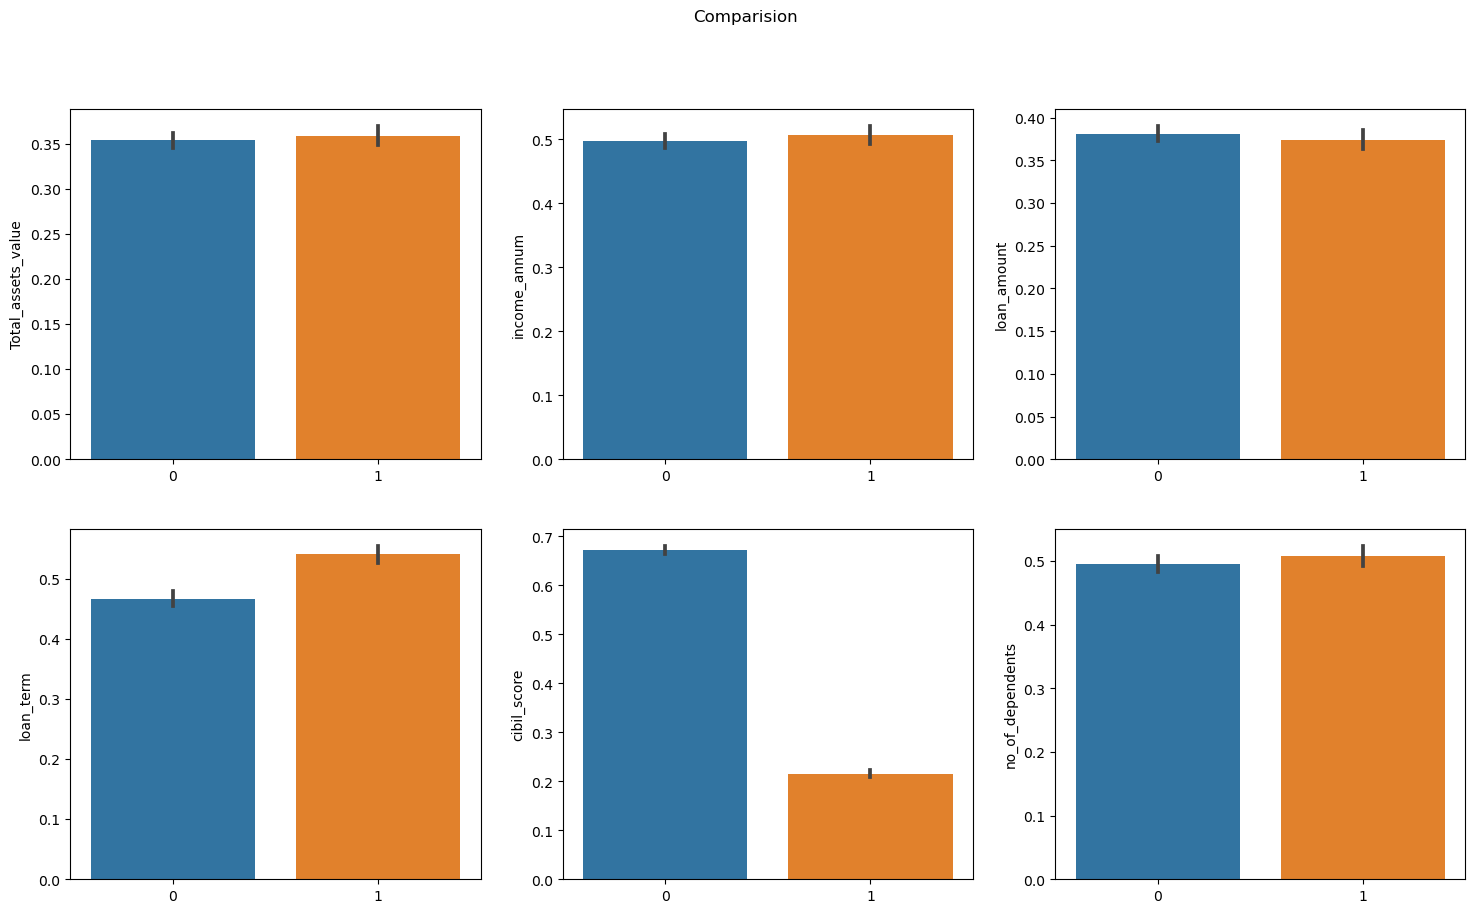

In [10]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Comparision')
sns.barplot( ax=axes[0, 0] ,x=y, y=df['Total_assets_value'])
sns.barplot( ax=axes[0, 1] ,x=y, y=df['income_annum'])
sns.barplot( ax=axes[0, 2] ,x=y, y=df['loan_amount'])
sns.barplot( ax=axes[1, 0] ,x=y, y=df['loan_term'])
sns.barplot( ax=axes[1, 1] ,x=y, y=df['cibil_score'])
sns.barplot( ax=axes[1, 2] ,x=y, y=df['no_of_dependents'])

# Modeling

In [11]:
import torch
torch.__version__
from sklearn.model_selection import train_test_split

In [12]:
len(df.columns)

10

In [13]:
X_train, X_test,y_train, y_test = train_test_split(df,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [14]:
 df.values

array([[0.4       , 0.96907216, 0.75510204, ..., 1.        , 0.        ,
        0.55703212],
       [0.        , 0.40206186, 0.30357143, ..., 0.        , 1.        ,
        0.18383167],
       [0.6       , 0.91752577, 0.75      , ..., 1.        , 0.        ,
        0.6345515 ],
       ...,
       [0.4       , 0.64948454, 0.60204082, ..., 1.        , 0.        ,
        0.42746401],
       [0.2       , 0.40206186, 0.31887755, ..., 1.        , 0.        ,
        0.3145072 ],
       [0.2       , 0.92783505, 0.75      , ..., 1.        , 0.        ,
        0.85160576]])

In [15]:

X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [16]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [17]:
# One way to create
class loaner(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1 = nn.Linear(in_features = 10 , out_features= 5 )
        self.layer2 = nn.Linear(in_features =  5 , out_features= 1 )
        
    def forward(self,x):
         return  self.layer2(self.layer1(x))

model = loaner().to(device)
model

loaner(
  (layer1): Linear(in_features=10, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model = nn.Sequential(
    nn.Linear(in_features = 10, out_features =10),
    nn.Linear(in_features = 10, out_features =3),
    nn.Linear(in_features = 3, out_features =1)).to(device)
# you can add ReLU() as well but here ir is decreasing the acc so removed.
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr = 0.9)

model

Sequential(
  (0): Linear(in_features=10, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=3, bias=True)
  (2): Linear(in_features=3, out_features=1, bias=True)
)

In [19]:
def accuracy_fn(y_true,y_preds):
    correct = torch.eq(y_true,y_preds).sum().item()
    acc = (correct/len(y_preds) * 100)
    return acc

## preparing training and testing loop

In [20]:
x_train , y_train = X_train.to(device) , y_train.to(device)
x_test , y_test = X_test.to(device) , y_test.to(device)

In [21]:
epoch = 100



for epochs in range(epoch):
    model.train()
    
    #forwaed pass
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    
    #calculate loss
    loss = loss_fn(y_logits,y_train)
    
    acc = accuracy_fn(y_true = y_train,
                      y_preds = y_pred)
    
    #optimizer
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits,
                           y_test)
        test_acc = accuracy_fn(y_true = y_test,
                              y_preds = test_preds)
    
    if epochs % 10 == 0:
         print(f"Epochs :{epochs} | loss: {loss:.{5}f} | acc: {acc:.{5}f}% | test_loss: {test_loss:.{5}f} | test_acc: {test_acc:.{5}f}% ")

Epochs :0 | loss: 0.65762 | acc: 62.35551% | test_loss: 0.65869 | test_acc: 61.79775% 
Epochs :10 | loss: 0.63172 | acc: 62.35551% | test_loss: 0.62952 | test_acc: 61.79775% 
Epochs :20 | loss: 0.47073 | acc: 81.28710% | test_loss: 0.43826 | test_acc: 84.17603% 
Epochs :30 | loss: 0.29368 | acc: 85.28585% | test_loss: 1.59035 | test_acc: 45.22472% 
Epochs :40 | loss: 0.56814 | acc: 64.63605% | test_loss: 0.52904 | test_acc: 73.12734% 
Epochs :50 | loss: 0.25013 | acc: 91.31521% | test_loss: 0.25247 | test_acc: 90.26217% 
Epochs :60 | loss: 0.63451 | acc: 62.35551% | test_loss: 0.62982 | test_acc: 61.79775% 
Epochs :70 | loss: 0.49702 | acc: 65.82318% | test_loss: 0.48110 | test_acc: 68.91386% 
Epochs :80 | loss: 0.25343 | acc: 92.06498% | test_loss: 0.25536 | test_acc: 90.73034% 
Epochs :90 | loss: 0.22578 | acc: 92.22118% | test_loss: 0.23810 | test_acc: 90.82397% 


# Other model trainings

In [22]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classification models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Support Vector Machine', SVC()),
    ('Neural Network', MLPClassifier()),
    ('XGBoost', XGBClassifier()),
    ('LightGBM', LGBMClassifier()),
    ('CatBoost', CatBoostClassifier(verbose=0)),
    ('Extra Trees', ExtraTreesClassifier())
]

# Train and evaluate each model
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))

# Display the results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
print(results_df)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                     Model  Accuracy
0      Logistic Regression     0.830
1            Decision Tree     0.835
2            Random Forest     0.885
3        Gradient Boosting     0.890
4      K-Nearest Neighbors     0.800
5              Naive Bayes     0.810
6   Support Vector Machine     0.830
7           Neural Network     0.830
8                  XGBoost     0.880
9                 LightGBM     0.880
10                CatBoost     0.875
11             Extra Trees     0.865


# Thus the best model we got is from deeplearning py model with avc acc of 90.8 %